Dataset Preview:
     Day  Open  Volume       Close        High         Low         MA5  \
9    10   174    1586  172.645189  177.855130  169.355478  170.245485   
10   11   187    2648  189.231447  193.830117  182.784092  183.560374   
11   12   199    2443  204.681212  208.177618  195.846394  187.347511   
12   13   123    2445  125.507134  128.666258  119.353379  173.439980   
13   14   102    1103  107.303193  110.058172   98.048577  159.873635   

          MA10  Price_Change    Return  Next_Close  Trend  
9   166.040644     -1.354811 -0.014216  189.231447      1  
10  168.897017      2.231447  0.096071  204.681212      1  
11  169.958201      5.681212  0.081645  125.507134      0  
12  170.825030      2.507134 -0.386817  107.303193      0  
13  164.381259      5.303193 -0.145043  117.655126      1  


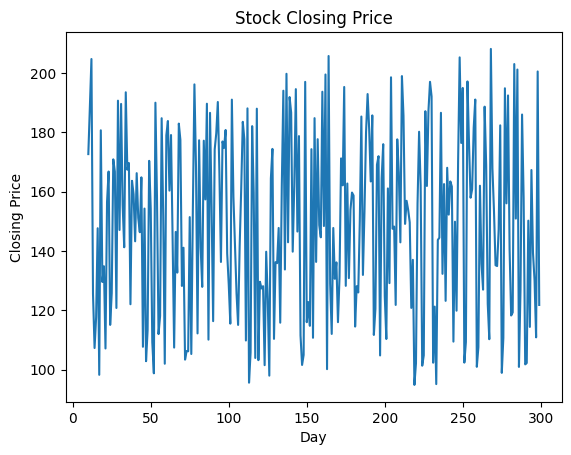

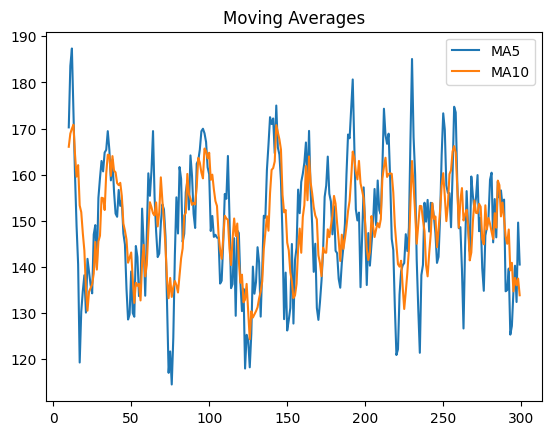

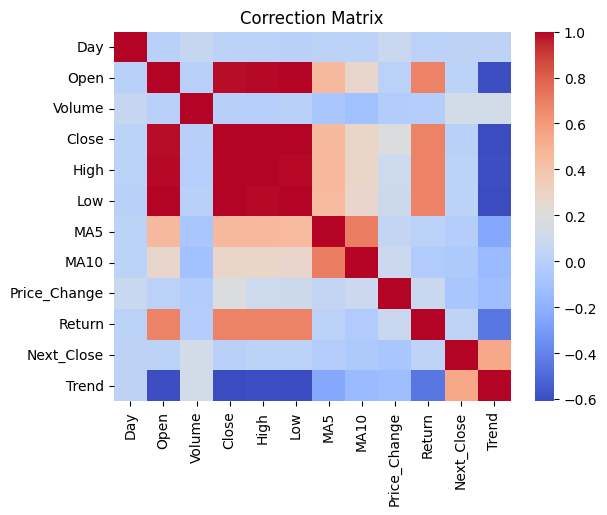


Regression results
R2 score: 0.07778277570054981
RMSE: 27.140519079834757


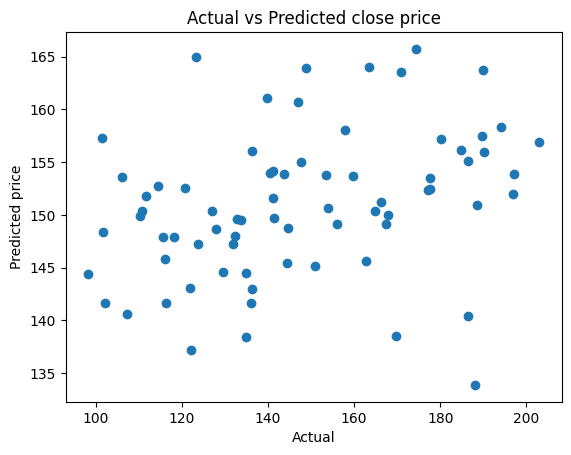


Classification results
Accuracy: 0.7808219178082192
Confusion Matrix:
 [[32  4]
 [12 25]]


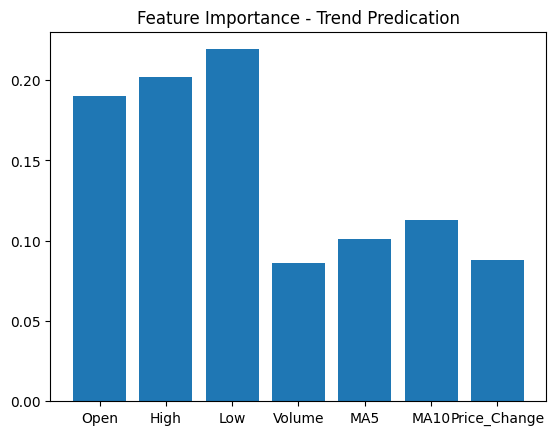


 stock Market Predication project completed successfully


In [2]:
#Stock Market PRICE & TREND Prediction Project
# 1) Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

# 2) Create Synthetic Stock Dataset
days = 300
data = pd.DataFrame({
    "Day" : np.arange(1, days+1),
    "Open" : np.random.randint(100, 200, days),
    "Volume" : np.random.randint(1000, 5000, days)
})

# Simulate Close Price based on Open + random noise
data["Close"] = data["Open"] + np.random.normal(0, 5, days)

# High and Low Prices
data["High"] = data[["Open","Close"]].max(axis=1) + np.random.uniform(1,5,days)
data["Low"] = data[["Open","Close"]].min(axis=1) - np.random.uniform(1,5,days)

# 3) Features Engineering (Tenchnical Indicators)

# 5-Day Moving Average
data["MA5"] = data["Close"].rolling(window=5).mean()

# 10-Day Moving Avarage
data["MA10"] = data["Close"].rolling(window=10).mean()

# Price Change
data["Price_Change"] = data["Close"] - data["Open"]

# Daily Return
data["Return"] = data["Close"].pct_change()

# Target 1 -> Regression (Next Day Close Price)
data["Next_Close"] = data["Close"].shift(-1)

# Target 2 -> Classification (Up=1, Down=0)
data["Trend"] = np.where(data["Next_Close"] > data["Close"], 1, 0)

# Remove missing values
data.dropna(inplace=True)

print("Dataset Preview:\n", data.head())

print("==============================================================================")

# 4) Data Visualization
plt.figure()
plt.plot(data["Day"], data["Close"])
plt.title("Stock Closing Price")
plt.xlabel("Day")
plt.ylabel("Closing Price")
plt.show()

print("==============================================================================")

plt.figure()
plt.plot(data["Day"],data["MA5"],label="MA5")
plt.plot(data["Day"],data["MA10"],label="MA10")
plt.legend()
plt.title("Moving Averages")
plt.show()

print("==============================================================================")

plt.figure()
sns.heatmap(data.corr(),cmap="coolwarm")
plt.title("Correction Matrix")
plt.show()

print("==============================================================================")

# 5) Regression Model (Predict next Day Close Price)

features = ["Open", "High", "Low", "Volume", "MA5", "MA10", "Price_Change"]

X_reg = data[features]
y_reg = data["Next_Close"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

print("\nRegression results")
print("R2 score:",r2_score(y_test_r,y_pred_r))
print("RMSE:",np.sqrt(mean_squared_error(y_test_r,y_pred_r)))

plt.figure()
plt.scatter(y_test_r,y_pred_r)
plt.xlabel("Actual")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted close price")
plt.show()

print("==============================================================================")

# 6)classification model(predict Trend Up/Down)
x_clf =data[features]
y_clf = data["Trend"]

x_train_c,x_test_c,y_train_c,y_test_c= train_test_split(
    x_clf,y_clf,test_size=0.25,random_state=42)
#FIx
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150,random_state=42)
rf_model.fit(x_train_c,y_train_c)

y_pred_c = rf_model.predict(x_test_c)

print("\nClassification results")
print("Accuracy:",accuracy_score(y_test_c,y_pred_c))
print("Confusion Matrix:\n",confusion_matrix(y_test_c,y_pred_c))

# Features Importance
importances = rf_model.feature_importances_

plt.figure()
plt.bar(features,importances)
plt.title("Feature Importance - Trend Predication")
plt.show()

print("\n stock Market Predication project completed successfully")